In [1]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from PIL import Image
%matplotlib inline

# 1

##  a

In [2]:
bab_noise = cv2.imread('bab_noise.bmp', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'bab noise')

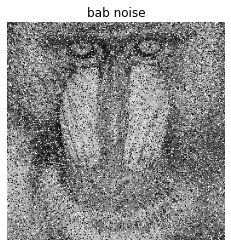

In [3]:
plt.imshow(bab_noise,cmap = 'gray')
plt.axis("off")
plt.title("bab noise")

In [4]:
bab = cv2.imread('baboon.bmp',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'bab')

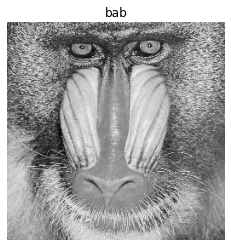

In [5]:
plt.imshow(bab,'gray')
plt.axis('off')
plt.title('bab')

In [54]:
def psnr(origin, noise):
    mse = ((origin-noise)**2).sum()/(origin.shape[0]*origin.shape[1])
    return 10*np.log10((255**2)/mse)

In [55]:
psnr(bab,bab_noise)

28.994347973545356

In [8]:
bab_noise_pad = cv2.copyMakeBorder(bab_noise,2,2,2,2,cv2.BORDER_REPLICATE)

In [9]:
def median_filter(img):
    ans = np.zeros((img.shape[0]-4,img.shape[1]-4))
    for i in range(2,img.shape[0]-2):
        for j in range(2,img.shape[1]-2):
            total = sorted([pix for pix in img[i-2:i+3,j-2:j+3].flatten() if pix != 0 and pix != 255])
            ans[i-2][j-2] = total[len(total)//2]
    return ans

In [10]:
bab_noise_median = median_filter(bab_noise_pad)

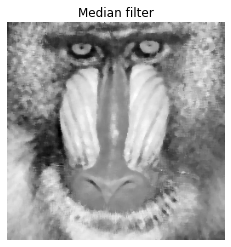

In [11]:
plt.imshow(bab_noise_median,'gray')
plt.axis("off")
plt.title('Median filter')
plt.savefig('Median_filter_bab.png')

In [12]:
psnr(bab,bab_noise_median)

20.02759323485787

In [13]:
pepper = cv2.imread('peppers.bmp',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'pepper')

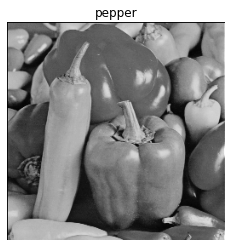

In [14]:
plt.imshow(pepper,'gray')
plt.axis('off')
plt.title('pepper')

In [15]:
pepper_noise = cv2.imread('peppers_noise.bmp',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'pepper noise')

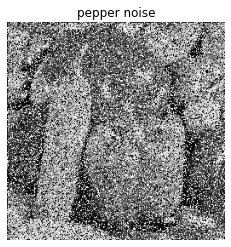

In [16]:
plt.imshow(pepper_noise,'gray')
plt.axis('off')
plt.title('pepper noise')

In [17]:
psnr(pepper,pepper_noise)

29.67360319886151

In [18]:
pepper_noise_pad = cv2.copyMakeBorder(pepper_noise,2,2,2,2,cv2.BORDER_REPLICATE)

In [19]:
median_filter_pepper = median_filter(pepper_noise_pad)

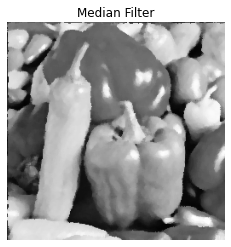

In [20]:
plt.imshow(median_filter_pepper,'gray')
plt.title('Median Filter')
plt.axis('off')
plt.savefig('median_filter_pepper.png')

In [21]:
psnr(median_filter_pepper,pepper)

24.64102076805334

##  b

In [22]:
gaussian = np.array([[0.0232,0.0338,0.0383,0.0338,0.0232],
                     [0.0338,0.0492,0.0558,0.0492,0.0338],
                     [0.0383,0.0558,0.0632,0.0558,0.0383],
                     [0.0338,0.0492,0.0558,0.0492,0.0338],
                     [0.0232,0.0338,0.0383,0.0338,0.0232]])

In [23]:
psnr(bab,bab_noise)

28.994347973545356

In [24]:
def gaussian_filter(img,gaussian):
    ans = np.zeros((img.shape[0]-4,img.shape[0]-4))
    for i in range(2,img.shape[0]-2):
        for j in range(2,img.shape[1]-2):
            ans[i-2][j-2] = np.ceil(np.multiply(img[i-2:i+3,j-2:j+3],gaussian).sum())
    return ans

In [25]:
bab_noise_gaussian = gaussian_filter(bab_noise_pad,gaussian)

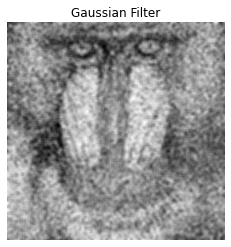

In [26]:
plt.imshow(bab_noise_gaussian,'gray')
plt.axis('off')
plt.title('Gaussian Filter')
plt.savefig('gaussian_filter_bab.png')

In [27]:
psnr(bab_noise_gaussian,bab)

19.14094101293629

In [28]:
pepper_noise_gaussian = gaussian_filter(pepper_noise_pad,gaussian)

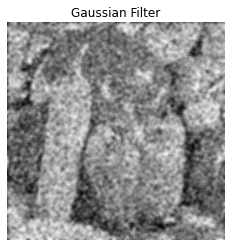

In [29]:
plt.imshow(pepper_noise_gaussian,'gray')
plt.axis('off')
plt.title('Gaussian Filter')
plt.savefig('gaussian_filter_pepper.png')

In [56]:
psnr(pepper_noise_gaussian,pepper)

18.41845782961651

##  c

In [30]:
bab_noise_90 = cv2.imread('bab_noise_90.bmp',cv2.IMREAD_GRAYSCALE)

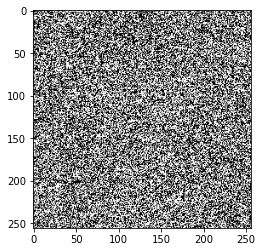

In [57]:
plt.imshow(bab_noise_90,'gray')

In [58]:
psnr(bab_noise_90,bab)

28.524173395859755

In [33]:
bab_noise_90_pad = cv2.copyMakeBorder(bab_noise_90,50,50,50,50,cv2.BORDER_REPLICATE)

In [34]:
def adaptive_median_filter(img):
    def adaptive(i,j):
        k = 0
        while True:
            box = img[i-k:i+k+1,j-k:j+k+1].flatten()
            box_flatten = [pix for pix in box if pix!=255 and pix!=0]
            if len(box_flatten)!=0:
                return box_flatten[len(box_flatten)//2]
            else:
                k+=1
    ans = np.zeros((img.shape[0]-100,img.shape[1]-100))
    for i in range(50,img.shape[0]-50):
        for j in range(50,img.shape[1]-50):
            ans[i-50,j-50] = adaptive(i,j)
    return ans

In [35]:
adapative = adaptive_median_filter(bab_noise_90_pad)

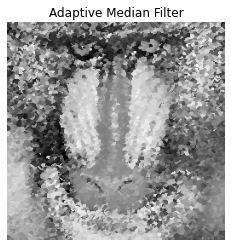

In [36]:
plt.imshow(adapative,'gray')
plt.axis('off')
plt.title('Adaptive Median Filter')
plt.savefig('adaptive_median_filter_bab')

In [37]:
psnr(adapative,bab)

17.51944738048344

# 2

## a

In [38]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

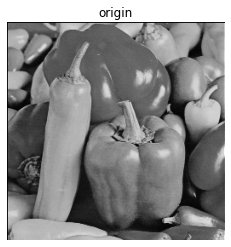

In [39]:
plt.imshow(pepper,'gray')
plt.axis('off')
plt.title('origin')
plt.savefig('origin_pepper.png')

In [40]:
pepper_pad = cv2.copyMakeBorder(pepper,1,1,1,1,cv2.BORDER_REPLICATE)

In [41]:
def sobel_filter(img,sobel):
    ans = np.zeros((img.shape[0]-2,img.shape[1]-2))
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            ans[i-1][j-1] = np.ceil(np.multiply(img[i-1:i+2,j-1:j+2],sobel).sum())
    return ans

In [42]:
pepper_sobel_x = sobel_filter(pepper_pad,sobel_x)
pepper_sobel_y = sobel_filter(pepper_pad,sobel_y)

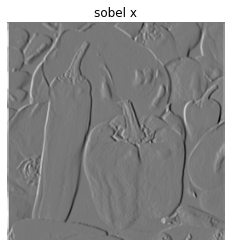

In [43]:
plt.imshow(pepper_sobel_x,'gray')
plt.title("sobel x")
plt.axis('off')
plt.savefig('sobel_x.png')

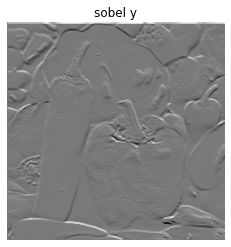

In [44]:
plt.imshow(pepper_sobel_y,'gray')
plt.title("sobel y")
plt.axis('off')
plt.savefig('sobel_y.png')

In [45]:
mag = np.hypot(pepper_sobel_x,pepper_sobel_y)
mag *= 255.0 / np.max(mag)

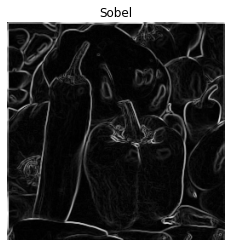

In [46]:
plt.imshow(mag,'gray')
plt.title('Sobel')
plt.axis('off')
plt.savefig('sobel.png')

## b

In [47]:
marr_hildreth = np.array([[0,0,-1,0,0],
                          [0,-1,-2,-1,0],
                          [-1,-2,16,-2,-1],
                          [0,-1,-2,-1,0],
                          [0,0,-1,0,0]])

In [48]:
marr_hildreth

array([[ 0,  0, -1,  0,  0],
       [ 0, -1, -2, -1,  0],
       [-1, -2, 16, -2, -1],
       [ 0, -1, -2, -1,  0],
       [ 0,  0, -1,  0,  0]])

In [49]:
pepper_pad2 = cv2.copyMakeBorder(pepper,2,2,2,2,cv2.BORDER_REPLICATE)

In [50]:
def marr_hildreth_filter(img,marr_hildreth):
    ans = np.zeros((img.shape[0]-4,img.shape[1]-4))
    for i in range(2,img.shape[0]-2):
        for j in range(2,img.shape[1]-2):
            ans[i-2,j-2] = 0 if np.multiply(img[i-2:i+3,j-2:j+3],marr_hildreth).sum()<=0 else np.multiply(img[i-2:i+3,j-2:j+3],marr_hildreth).sum()
    return ans

In [51]:
pepper_marr = marr_hildreth_filter(pepper_pad2,marr_hildreth)

In [52]:
pepper_marr *= 255/np.max(pepper_marr)

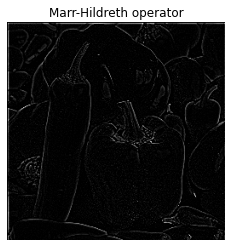

In [53]:
plt.imshow(pepper_marr,'gray')
plt.title("Marr-Hildreth operator")
plt.axis("off")
plt.savefig('marr_hildreth.png')